In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = {
    "Subject": ["Big Data (Spark / Hadoop)", "Data Analysis / Statistics", "Data Journalism", "Data Visualization", "Deep Learning", "Machine Learning"],
    "Very Interested": [1332, 1688, 429, 1340, 1263, 1629],
    "Somewhat Interested": [729, 444, 1081, 734, 770, 477],
    "Not Interested": [127, 60, 610, 102, 136, 74]
}

In [3]:
df = pd.DataFrame(arr)
ttl_response = 2233
df.head()

,Subject,Very Interested,Somewhat Interested,Not Interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


Task 1: Sort by "Very Interested" in descending order and convert to percentages

In [4]:

df_sorted = df.sort_values(by="Very Interested", ascending=False)
df_sorted_percent = df_sorted.copy()
df_sorted_percent.iloc[:, 1:] = df_sorted_percent.iloc[:, 1:].apply(lambda x: (x / ttl_response) * 100).round(2)

/var/folders/p7/bnyr73ds55qgdcgrd6z0r8400000gn/T/ipykernel_5203/1292658156.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1    75.59
5    72.95
3    60.01
0    59.65
4    56.56
2    19.21
Name: Very Interested, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sorted_percent.iloc[:, 1:] = df_sorted_percent.iloc[:, 1:].apply(lambda x: (x / ttl_response) * 100).round(2)
/var/folders/p7/bnyr73ds55qgdcgrd6z0r8400000gn/T/ipykernel_5203/1292658156.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1    19.88
5    21.36
3    32.87
0    32.65
4    34.48
2    48.41
Name: Somewhat Interested, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sorted_percent.iloc[:, 1:] = df_sorted_percent.iloc[:, 1:].apply(lambda x: (x / ttl_response) 

Plotting bar chart

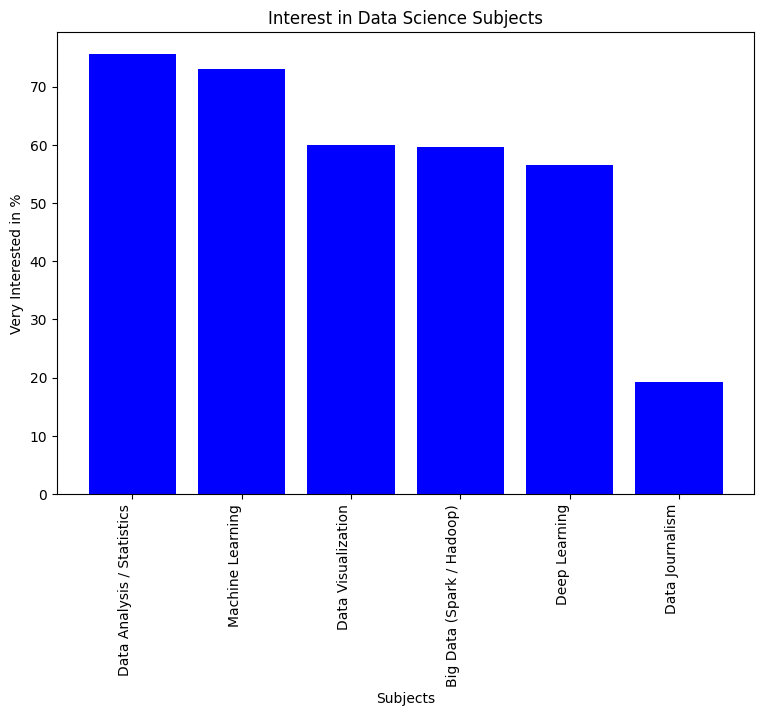

In [5]:

plt.figure(figsize=(9, 6))
plt.bar(df_sorted_percent['Subject'], df_sorted_percent['Very Interested'], color='blue')
plt.xticks(rotation=90, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Very Interested in %")
plt.title("Interest in Data Science Subjects")
plt.show()

Task 2: Probability of selecting a "Very Interested" response greater than 1400

In [6]:
prob = df[df["Very Interested"] > 1400]["Very Interested"].sum() / ttl_response
print(f"Probability: {round(prob, 4)}")

Probability: 1.4854


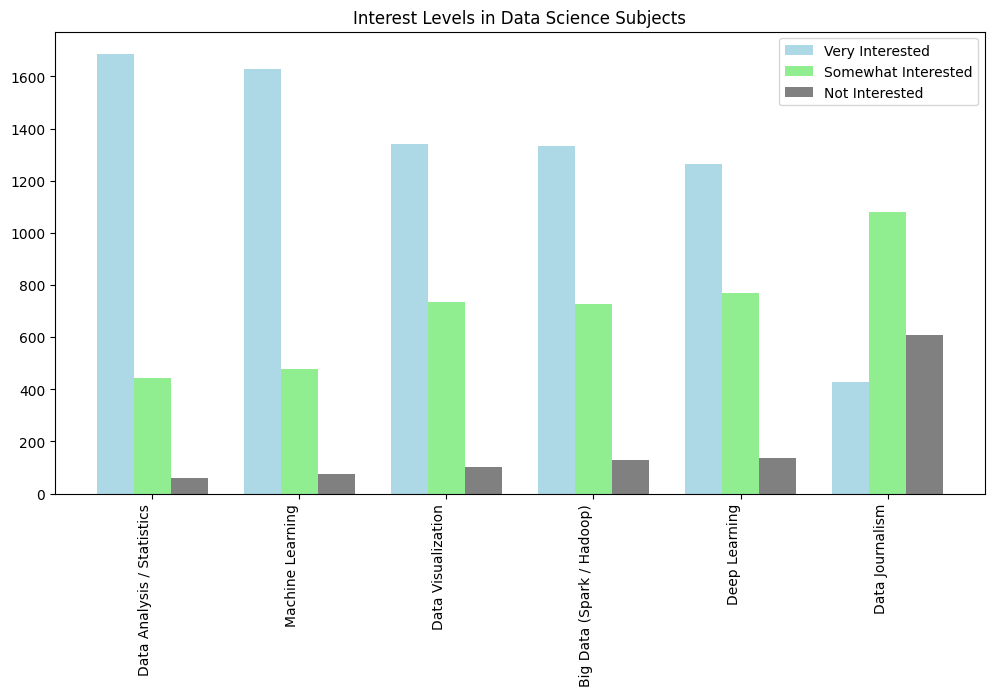

In [7]:
plt.figure(figsize=(12, 6))
x = np.arange(len(df_sorted["Subject"]))
width = 0.25
plt.bar(x - width, df_sorted["Very Interested"], width=width, label="Very Interested", color='lightblue')
plt.bar(x, df_sorted["Somewhat Interested"], width=width, label="Somewhat Interested", color='lightgreen')
plt.bar(x + width, df_sorted["Not Interested"], width=width, label="Not Interested", color='grey')
plt.xticks(ticks=x, labels=df_sorted["Subject"], rotation=90, ha='right')
plt.legend()
plt.title("Interest Levels in Data Science Subjects")
plt.show()

In [8]:
new_df = pd.DataFrame({
    "Subject": ["Machine Learning", "Artificial Intelligence (AI)", "Cloud Computing"],
    "Very Interested": [2000, 1500, 1300],
    "Somewhat Interested": [np.nan, 600, 900],
    "Not Interested": [100, 200, np.nan]
})

In [9]:
df_extended = pd.concat([df, new_df], ignore_index=True)
print("Missing Values:\n", df_extended.isnull().sum())

Missing Values:
 Subject                0
Very Interested        0
Somewhat Interested    1
Not Interested         1
dtype: int64


In [10]:
df_extended.fillna(df_extended.select_dtypes(include=[np.number]).mean(), inplace=True)


Task 5: Export to CSV

In [11]:

df_extended.to_csv("interest_analysis.csv", index=False)

Task 6: Compare AI, ML, and Cloud Computing

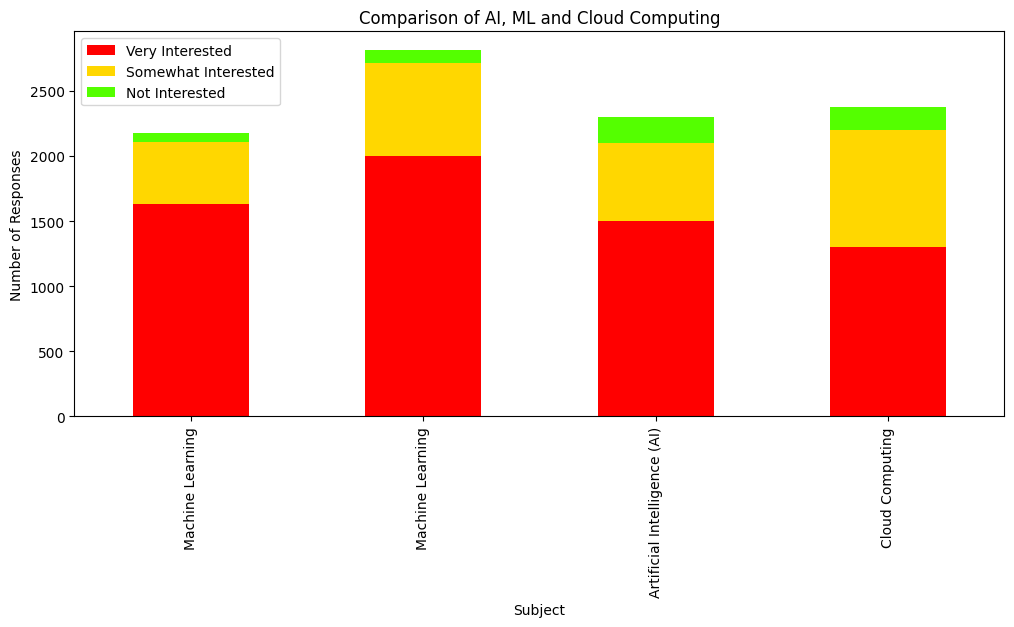

In [12]:
subset = df_extended[df_extended['Subject'].isin(["Machine Learning", "Artificial Intelligence (AI)", "Cloud Computing"])]
subset.plot(x="Subject", kind="bar", stacked=True, figsize=(12, 5),colormap='prism')
plt.title("Comparison of AI, ML and Cloud Computing")
plt.ylabel("Number of Responses")
plt.legend(loc='upper left')
plt.show()
